In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy.interpolate as ip

원하는 이미지 3중 1택
이미지의 크기를 500x500으로 변경
Nearest neighbor, bilinear, bicubic으로 보간한 결과 비교 

+) 이미지 회전등 시도

<class 'astropy.io.fits.hdu.hdulist.HDUList'>
Filename: image3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (100, 100)   uint8   


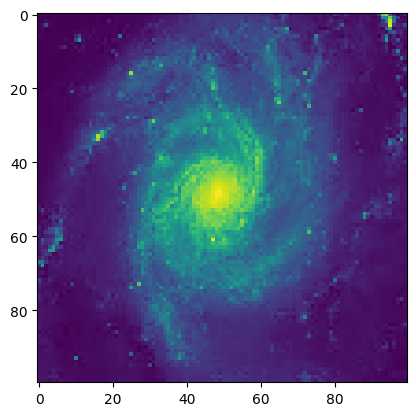

In [2]:
pic = fits.open('image3.fits')
print(type(pic))
pic.info()
pic[0].header

data_arr = pic[0].data

plt.imshow(data_arr)

In [15]:
from scipy.interpolate import griddata

x = np.linspace(0, 1, data_arr.shape[1])
y = np.linspace(0, 1, data_arr.shape[0])
X, Y = np.meshgrid(x, y)

x_new = np.linspace(0, 1, 500)
y_new = np.linspace(0, 1, 500)
X_new, Y_new = np.meshgrid(x_new, y_new)

result_nearest = griddata((X.flatten(), Y.flatten()), data_arr.flatten(), (X_new, Y_new), method='nearest')
result_linear = griddata((X.flatten(), Y.flatten()), data_arr.flatten(), (X_new, Y_new), method='linear')
result_cubic = griddata((X.flatten(), Y.flatten()), data_arr.flatten(), (X_new, Y_new), method='cubic')

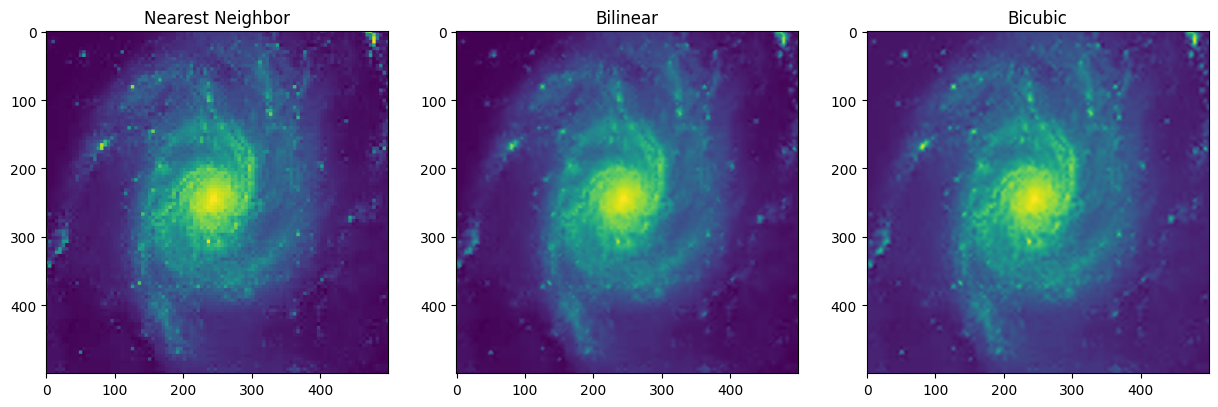

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Nearest Neighbor")
plt.imshow(result_nearest)

plt.subplot(1, 3, 2)
plt.title("Bilinear")
plt.imshow(result_linear)

plt.subplot(1, 3, 3)
plt.title("Bicubic")
plt.imshow(result_cubic)

plt.show()

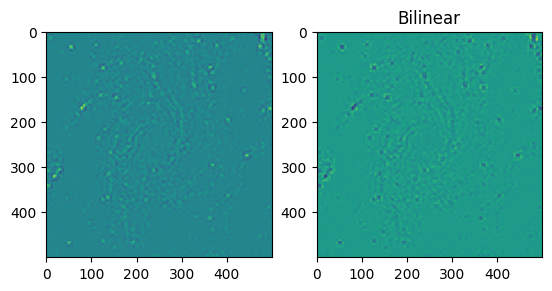

In [28]:
result_re = result_cubic - result_linear

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(result_re)

plt.subplot(1, 2, 2)
plt.title("Bilinear")
plt.imshow(-result_re)

plt.show()

C:\Users\AGN\AppData\Local\Temp\ipykernel_20172\402120703.py:1: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import rotate


ValueError: different number of values and points

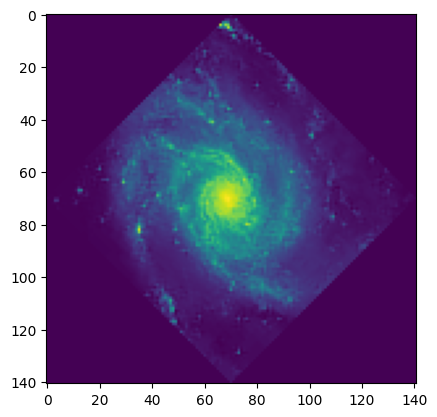

In [ ]:
from scipy.ndimage.interpolation import rotate

rotate_result = rotate(data_arr, 45)
plt.imshow(rotate_result)

a = np.linspace(0, 1, rotate_result.shape[1])
b = np.linspace(0, 1, rotate_result.shape[0])
A, B = np.meshgrid(x, y)

a_new = np.linspace(0, 1, 500)
b_new = np.linspace(0, 1, 500)
A_new, B_new = np.meshgrid(a_new, b_new)

res_int = griddata((A.flatten(), B.flatten()), data_arr, (A_new, B_new), method='cubic')
plt.imshow(res_int)